# Limits of Diversification

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

In [3]:
ind_return=erk.get_ind_returns()
ind_nfirms=erk.get_ind_nfirms()
ind_size=erk.get_ind_size()

In [4]:
ind_mktcap = ind_nfirms * ind_size

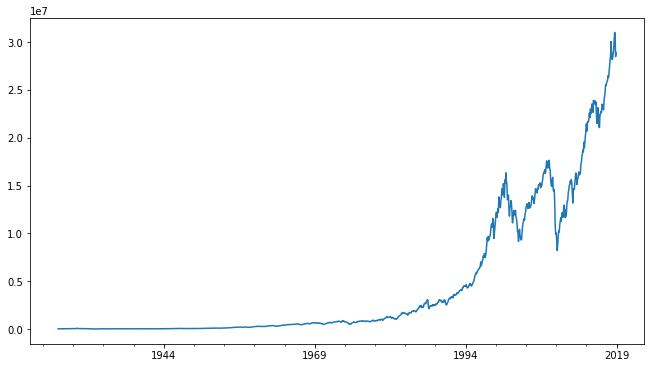

In [5]:
total_mktcap=ind_mktcap.sum(axis="columns")
total_mktcap.plot(figsize=(11,6))

In [6]:
ind_capweight = ind_mktcap.divide(total_mktcap,axis="rows")

In [7]:
total_market_return=(ind_capweight*ind_return).sum(axis="columns")

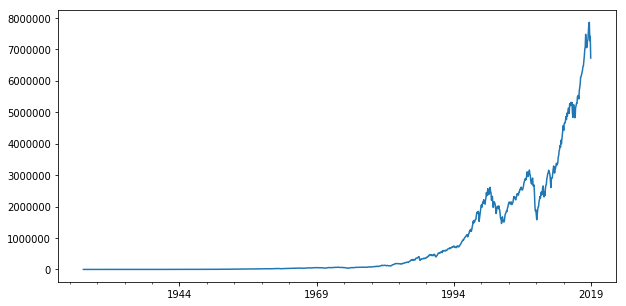

In [8]:
total_market_index=erk.drawdowns(total_market_return).Wealth
total_market_index.plot(figsize=(10,5))

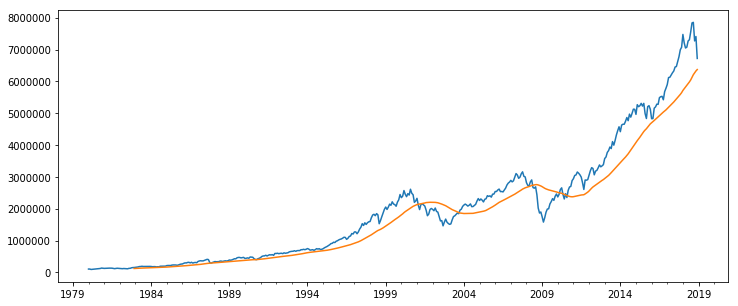

In [10]:
total_market_index["1980":].plot(figsize=(12,5))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,5))


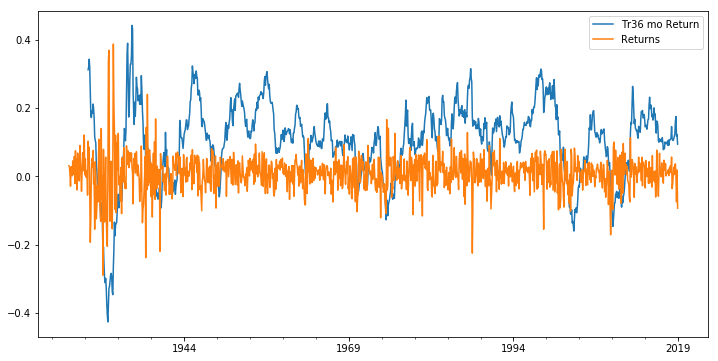

In [13]:
tmi_tr36rets=total_market_return.rolling(window=36).aggregate(erk.annualize_rets,periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6),label="Tr36 mo Return",legend=True)
total_market_return.plot(label="Returns", legend=True)

# Rolling Correlation  -along with MultIndexes and .groupby

In [14]:
ts_corr=ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls    ...        Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197    ...     0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202    ...     0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726    ...     0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090    ...     0.420863   
        Other  0.467099  0.645035  0.712511  0.520953    ...     0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [19]:
ts_corr.index.names=['date','industry']
ind_tr36corr=ts_corr.groupby(level='date').apply(lambda corrmat: corrmat.values.mean())

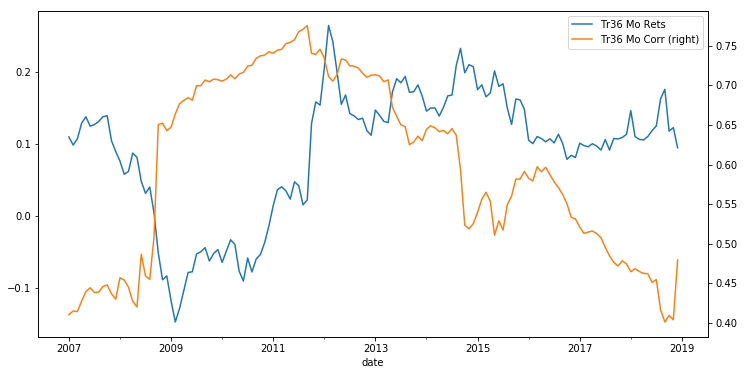

In [26]:
tmi_tr36rets["2007":].plot(label="Tr36 Mo Rets",figsize=(12,6),legend=True)
ind_tr36corr["2007":].plot(label="Tr36 Mo Corr",legend=True,secondary_y=True)